In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv
/kaggle/input/images/netflix_logo_icon_170919.png


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data

In [3]:
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning

In [4]:
# checking for null values
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# filling null values for country
data['country'] = data['country'].fillna(data['country'].mode()[0])

# replacing null with No Data
data['director'].replace(np.nan, 'No Data', inplace=True)
data['cast'].replace(np.nan, 'No Data', inplace=True)

/tmp/ipykernel_3550/1891685435.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].replace(np.nan, 'No Data', inplace=True)
/tmp/ipykernel_3550/1891685435.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [6]:
# drop null values
data.dropna(inplace=True)

In [7]:
# adding date format
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), infer_datetime_format='%B %d, %Y')

/tmp/ipykernel_3550/4255439237.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), infer_datetime_format='%B %d, %Y')


## Data Visualization

In [8]:
# Setting Graph style
plt.style.use('ggplot')

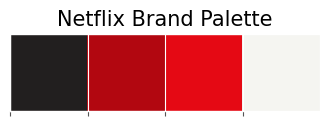

In [9]:
# Using Netflix Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title('Netflix Brand Palette', fontsize=15)
plt.show()

### 1. Distribution of Movies and TV Shows

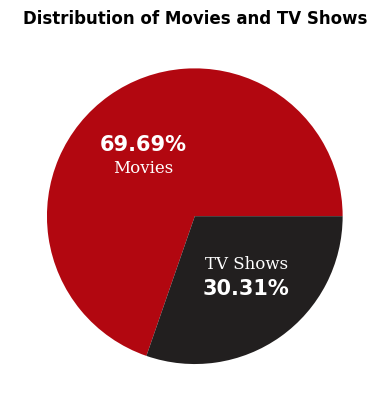

In [10]:
# calculating the count of movies and tv shows
movies_count = data.loc[data['type'] == 'Movie']['title'].count()
tvshows_count = data.loc[data['type'] == 'TV Show']['title'].count()

# specify colors
colors = ['#b20710', '#221f1f']

# plotting the graph
plt.pie([movies_count, tvshows_count], colors=colors, autopct='%0.2f%%', textprops={'color':'white', 'fontsize':15, 'fontweight':'bold'})

# adding text
plt.annotate('Movies', xy=(-0.55,0.3), color='white', fontsize=12, font='serif')
plt.annotate('TV Shows', xy=(0.07,-0.35), color='white', fontsize=12, font='serif')

plt.title('Distribution of Movies and TV Shows', fontsize=12, fontweight='bold')

plt.show()

### 2. Countrywise distribution of content

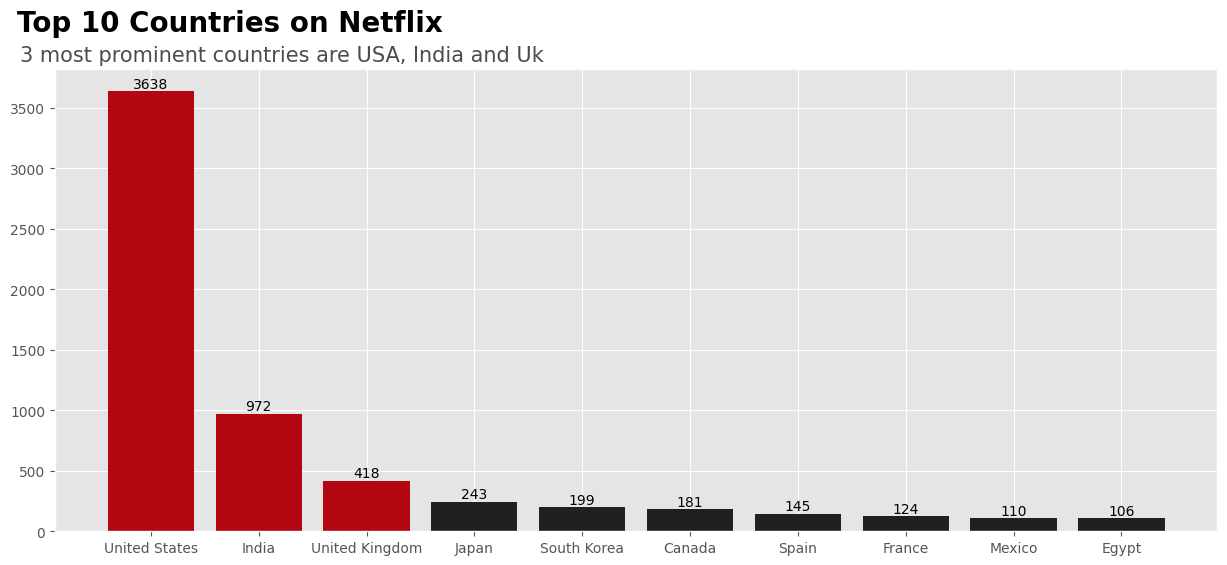

In [11]:
plt.figure(figsize=(15,6))

countries = data['country'].value_counts()
countries

name=[]
values=[]

for key, value in countries.items():
    if len(name) < 10:
        name.append(key)
        values.append(value)
        
colors=['#221f1f' for _ in range(10)]
colors[0] = colors[1] = colors[2] = '#b20710'

bars = plt.bar(name, values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+1, int(yval), ha='center', va='bottom')

plt.suptitle('Top 10 Countries on Netflix', fontsize=20, fontweight='bold', x=0.1, ha='left')
plt.title('3 most prominent countries are USA, India and Uk', fontsize=15, fontweight='light', x=-0.03, ha='left', alpha=0.7)

plt.show()

### 3. Content split between Movies and TV Shows

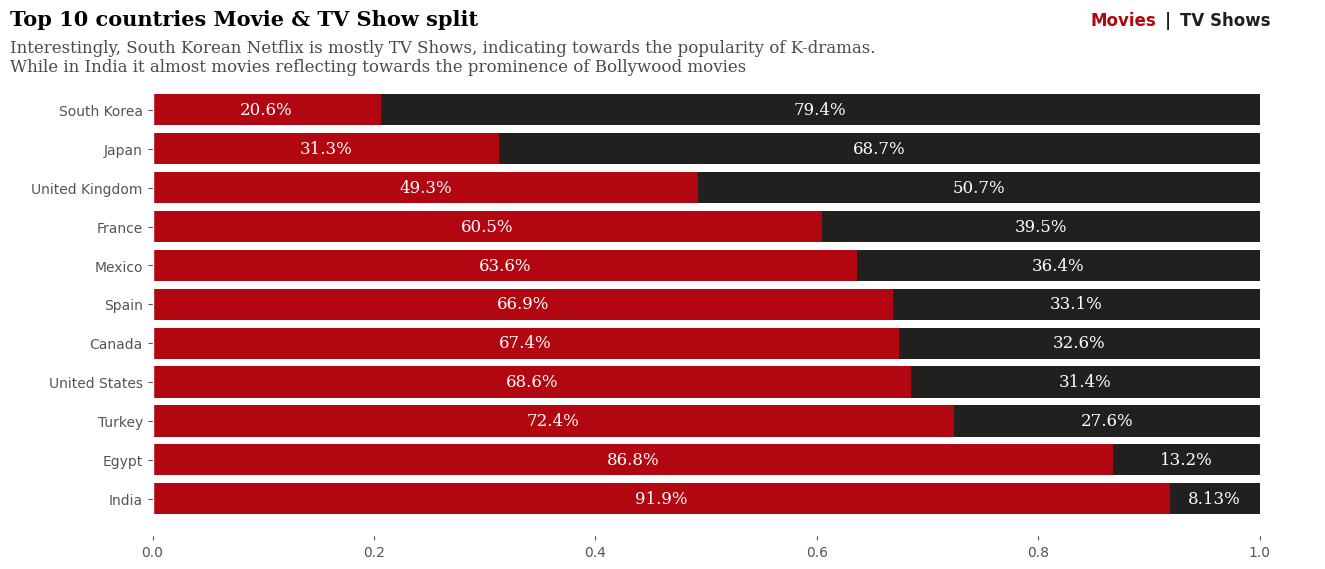

In [12]:
top_countries = data['country'].value_counts()[:11].index
values = data[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[top_countries]
values['sum'] = values.sum(axis=1)
values['movie_ratio'] = values.apply(lambda x: x['Movie']/x['sum'], axis=1)
values['tv_shows_ratio'] = values.apply(lambda x: x['TV Show']/x['sum'], axis=1)
values = values.sort_values(by='movie_ratio', ascending=False)
values

fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.barh(values.index, values['movie_ratio'], color='#b20710', label='Movie')
ax.barh(values.index, values['tv_shows_ratio'], left=values['movie_ratio'], color='#221f1f', label='TV Shows')
    
for i in values.index:
    ax.annotate(f"{values['movie_ratio'][i]*100:.3}%", xy=(values['movie_ratio'][i]/2,i), va='center', ha='center', fontsize=12, color='white', font='serif')
    ax.annotate(f"{values['tv_shows_ratio'][i]*100:.3}%", xy=(values['movie_ratio'][i]+values['tv_shows_ratio'][i]/2,i), va='center', ha='center', fontsize=12, color='white', font='serif')
    
fig.text(0.03, 0.96, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.03, 0.85, 
'''
Interestingly, South Korean Netflix is mostly TV Shows, indicating towards the popularity of K-dramas.
While in India it almost movies reflecting towards the prominence of Bollywood movies
''', fontsize=12, fontweight='light', fontfamily='serif', alpha=0.7)
fig.text(0.75, 0.96, 'Movies', color='#b20710', fontsize=12, fontweight='bold')
fig.text(0.8, 0.96, '|', color='#221f1f', fontsize=12, fontweight='bold')
fig.text(0.81, 0.96, 'TV Shows', color='#221f1f', fontsize=12, fontweight='bold')

# Remove grid lines for all subplots
ax.grid(False)

fig.patch.set_facecolor('none')
ax.set_facecolor('none')
    
plt.show()

### 4. Rating distribution 

In [13]:
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1558,s1559,Movie,Giving Voice,"James D. Stern, Fernando Villena","Viola Davis, Denzel Washington, Stephen Hender...",United States,2020-12-11,2020,PG-13,91 min,Documentaries,Six ambitious student actors audition for the ...
7164,s7165,Movie,Kahlil Gibran's The Prophet,"Roger Allers, Gaëtan Brizzi, Paul Brizzi, Joan...","Liam Neeson, Salma Hayek, John Krasinski, Fran...","United States, France, Canada, Lebanon, Qatar",2017-10-01,2014,PG,85 min,"Children & Family Movies, Dramas",A troubled young girl and her mother find sola...
5577,s5578,Movie,100 Meters,Marcel Barrena,"Dani Rovira, Karra Elejalde, Alexandra Jiménez...","Portugal, Spain",2017-03-10,2016,TV-MA,109 min,"Dramas, International Movies, Sports Movies",A man who is diagnosed with multiple sclerosis...
2786,s2787,Movie,A Life of Speed: The Juan Manuel Fangio Story,Francisco Macri,No Data,Argentina,2020-03-20,2020,TV-14,93 min,"Documentaries, International Movies, Sports Mo...","Juan Manuel Fangio was the Formula One king, w..."
496,s497,Movie,Brick Mansions,Camille Delamarre,"Paul Walker, David Belle, RZA, Gouchy Boy, Cat...","France, Canada, United States, Spain",2021-07-07,2014,PG-13,90 min,"Action & Adventure, International Movies",An undercover police detective partners with a...


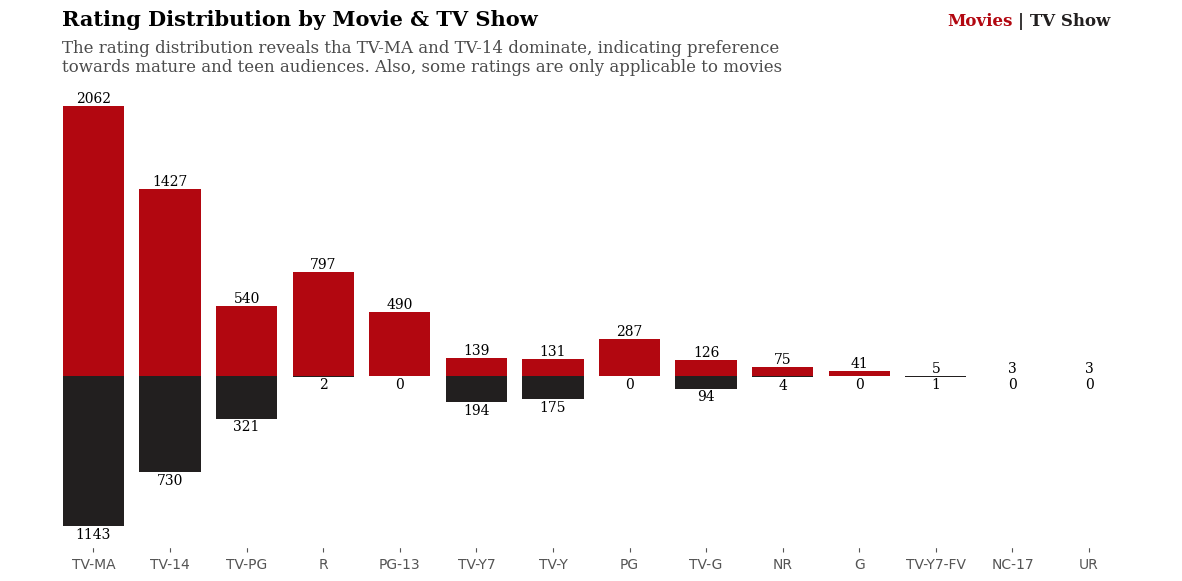

In [14]:
rating_order = data.groupby('rating').size().sort_values(ascending=False).index

ratings = data.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)
ratings = ratings[rating_order]

movie = ratings.loc['Movie']
tv_show = - ratings.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(15,6))

ax.bar(movie.index, movie, color='#b20710', label='Movie')
ax.bar(tv_show.index, tv_show, color='#221f1f', label='TV Show')

# annotations
for i in tv_show.index:
    ax.annotate(f"{-tv_show[i]}", xy=(i, tv_show[i]-60), va='center', ha='center', fontweight='light', font='serif')
    
for i in movie.index:
    ax.annotate(f"{movie[i]}", xy=(i, movie[i]+60), va='center', ha='center', fontweight='light', font='serif')
    
fig.text(0.16, 0.98, 'Rating Distribution by Movie & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16,0.87,
'''The rating distribution reveals tha TV-MA and TV-14 dominate, indicating preference 
towards mature and teen audiences. Also, some ratings are only applicable to movies
''', fontsize=12, fontweight='light', font='serif', alpha=0.7)
fig.text(0.75, 0.98, "Movies", fontsize=12, fontweight='bold', color='#b20710', font='serif')
fig.text(0.797, 0.98, "|", fontsize=12, fontweight='bold', color='#221f1f', font='serif')
fig.text(0.805, 0.98, "TV Show", fontsize=12, fontweight='bold', color='#221f1f', font='serif')


# Remove grid lines for all subplots
ax.grid(False)

fig.patch.set_facecolor('none')
ax.set_facecolor('none')

ax.set_yticks([])

plt.show()

### 5. Over Time Distribution

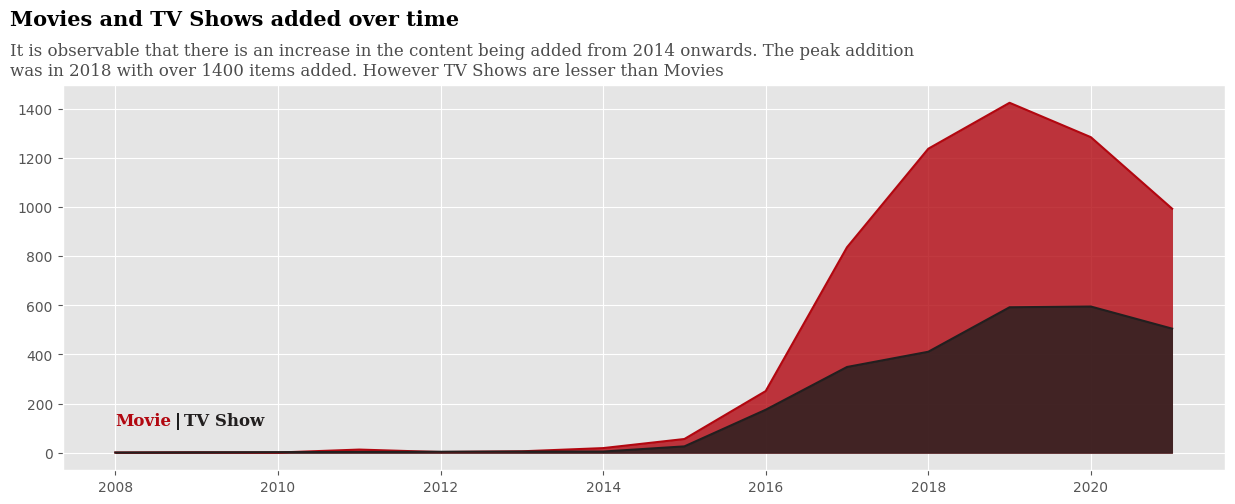

In [15]:
data['year'] = data['date_added'].dt.year

colors = ['#b20710', '#221f1f']

fig, ax = plt.subplots(1,1,figsize=(15,5))

for i, mtv in enumerate(data['type'].value_counts().index):
    mtv_rel = data[data['type'] == mtv]['year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, label=mtv, color=colors[i])
    plt.fill_between(mtv_rel.index, mtv_rel, color=colors[i], alpha=0.8)
    
fig.text(0.09,1.0,"Movies and TV Shows added over time", fontsize=15, fontweight='bold', font='serif')
fig.text(0.09,0.90,'''It is observable that there is an increase in the content being added from 2014 onwards. The peak addition 
was in 2018 with over 1400 items added. However TV Shows are lesser than Movies''', fontsize=12, fontweight='light', font='serif', alpha=0.7)
fig.text(0.16,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')
fig.text(0.20,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.206,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
    
plt.show()

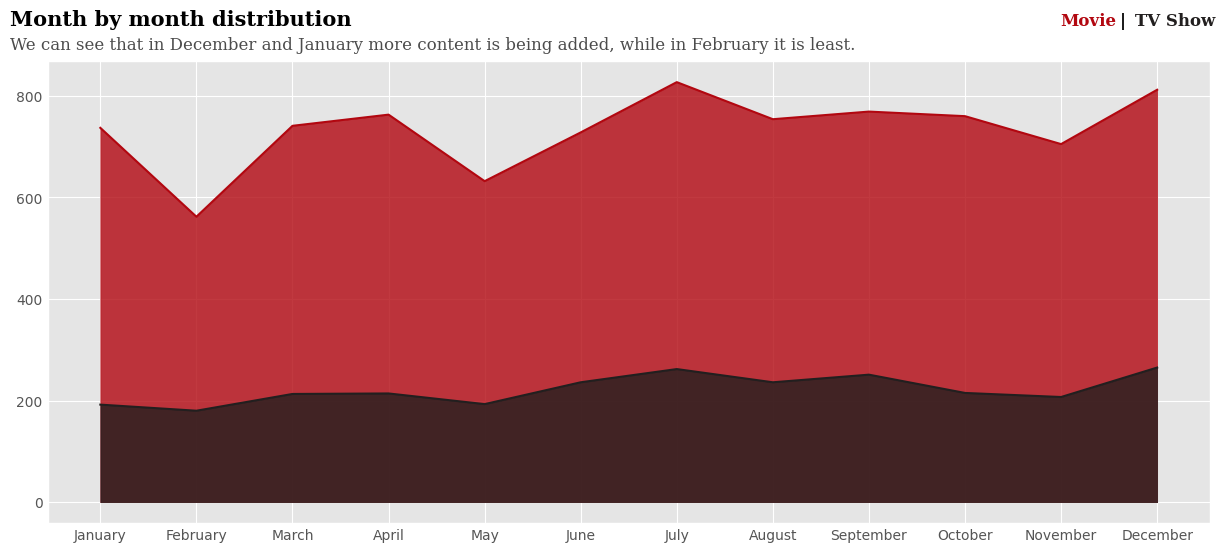

In [16]:
# month by month distribution
data['month'] = data['date_added'].dt.month
colors = ['#b20710', '#221f1f']

month_data = data.groupby('type')['month'].value_counts().unstack().fillna(0).loc[['TV Show', 'Movie']].cumsum(axis=0).T

fig,ax=plt.subplots(1,1,figsize=(15,6))

for i, mtv in enumerate(data['type'].value_counts().index):
    mtv_rel = month_data[mtv]
    ax.plot(mtv_rel.index, mtv_rel, label=mtv, color=colors[i])
    plt.fill_between(mtv_rel.index, mtv_rel, color=colors[i], alpha=0.8)
    
ax.set_xticks(range(1, 13))    
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    
fig.text(0.10,0.94,"Month by month distribution", fontsize=15, fontweight='bold', font='serif')
fig.text(0.10,0.90,"We can see that in December and January more content is being added, while in February it is least.", fontsize=12, fontweight='light', font='serif', alpha=0.7)
fig.text(0.8,0.94,"Movie", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')
fig.text(0.84,0.94,"|", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.85,0.94,"TV Show", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)
    
plt.show()
    

### 6. Netflix Genres

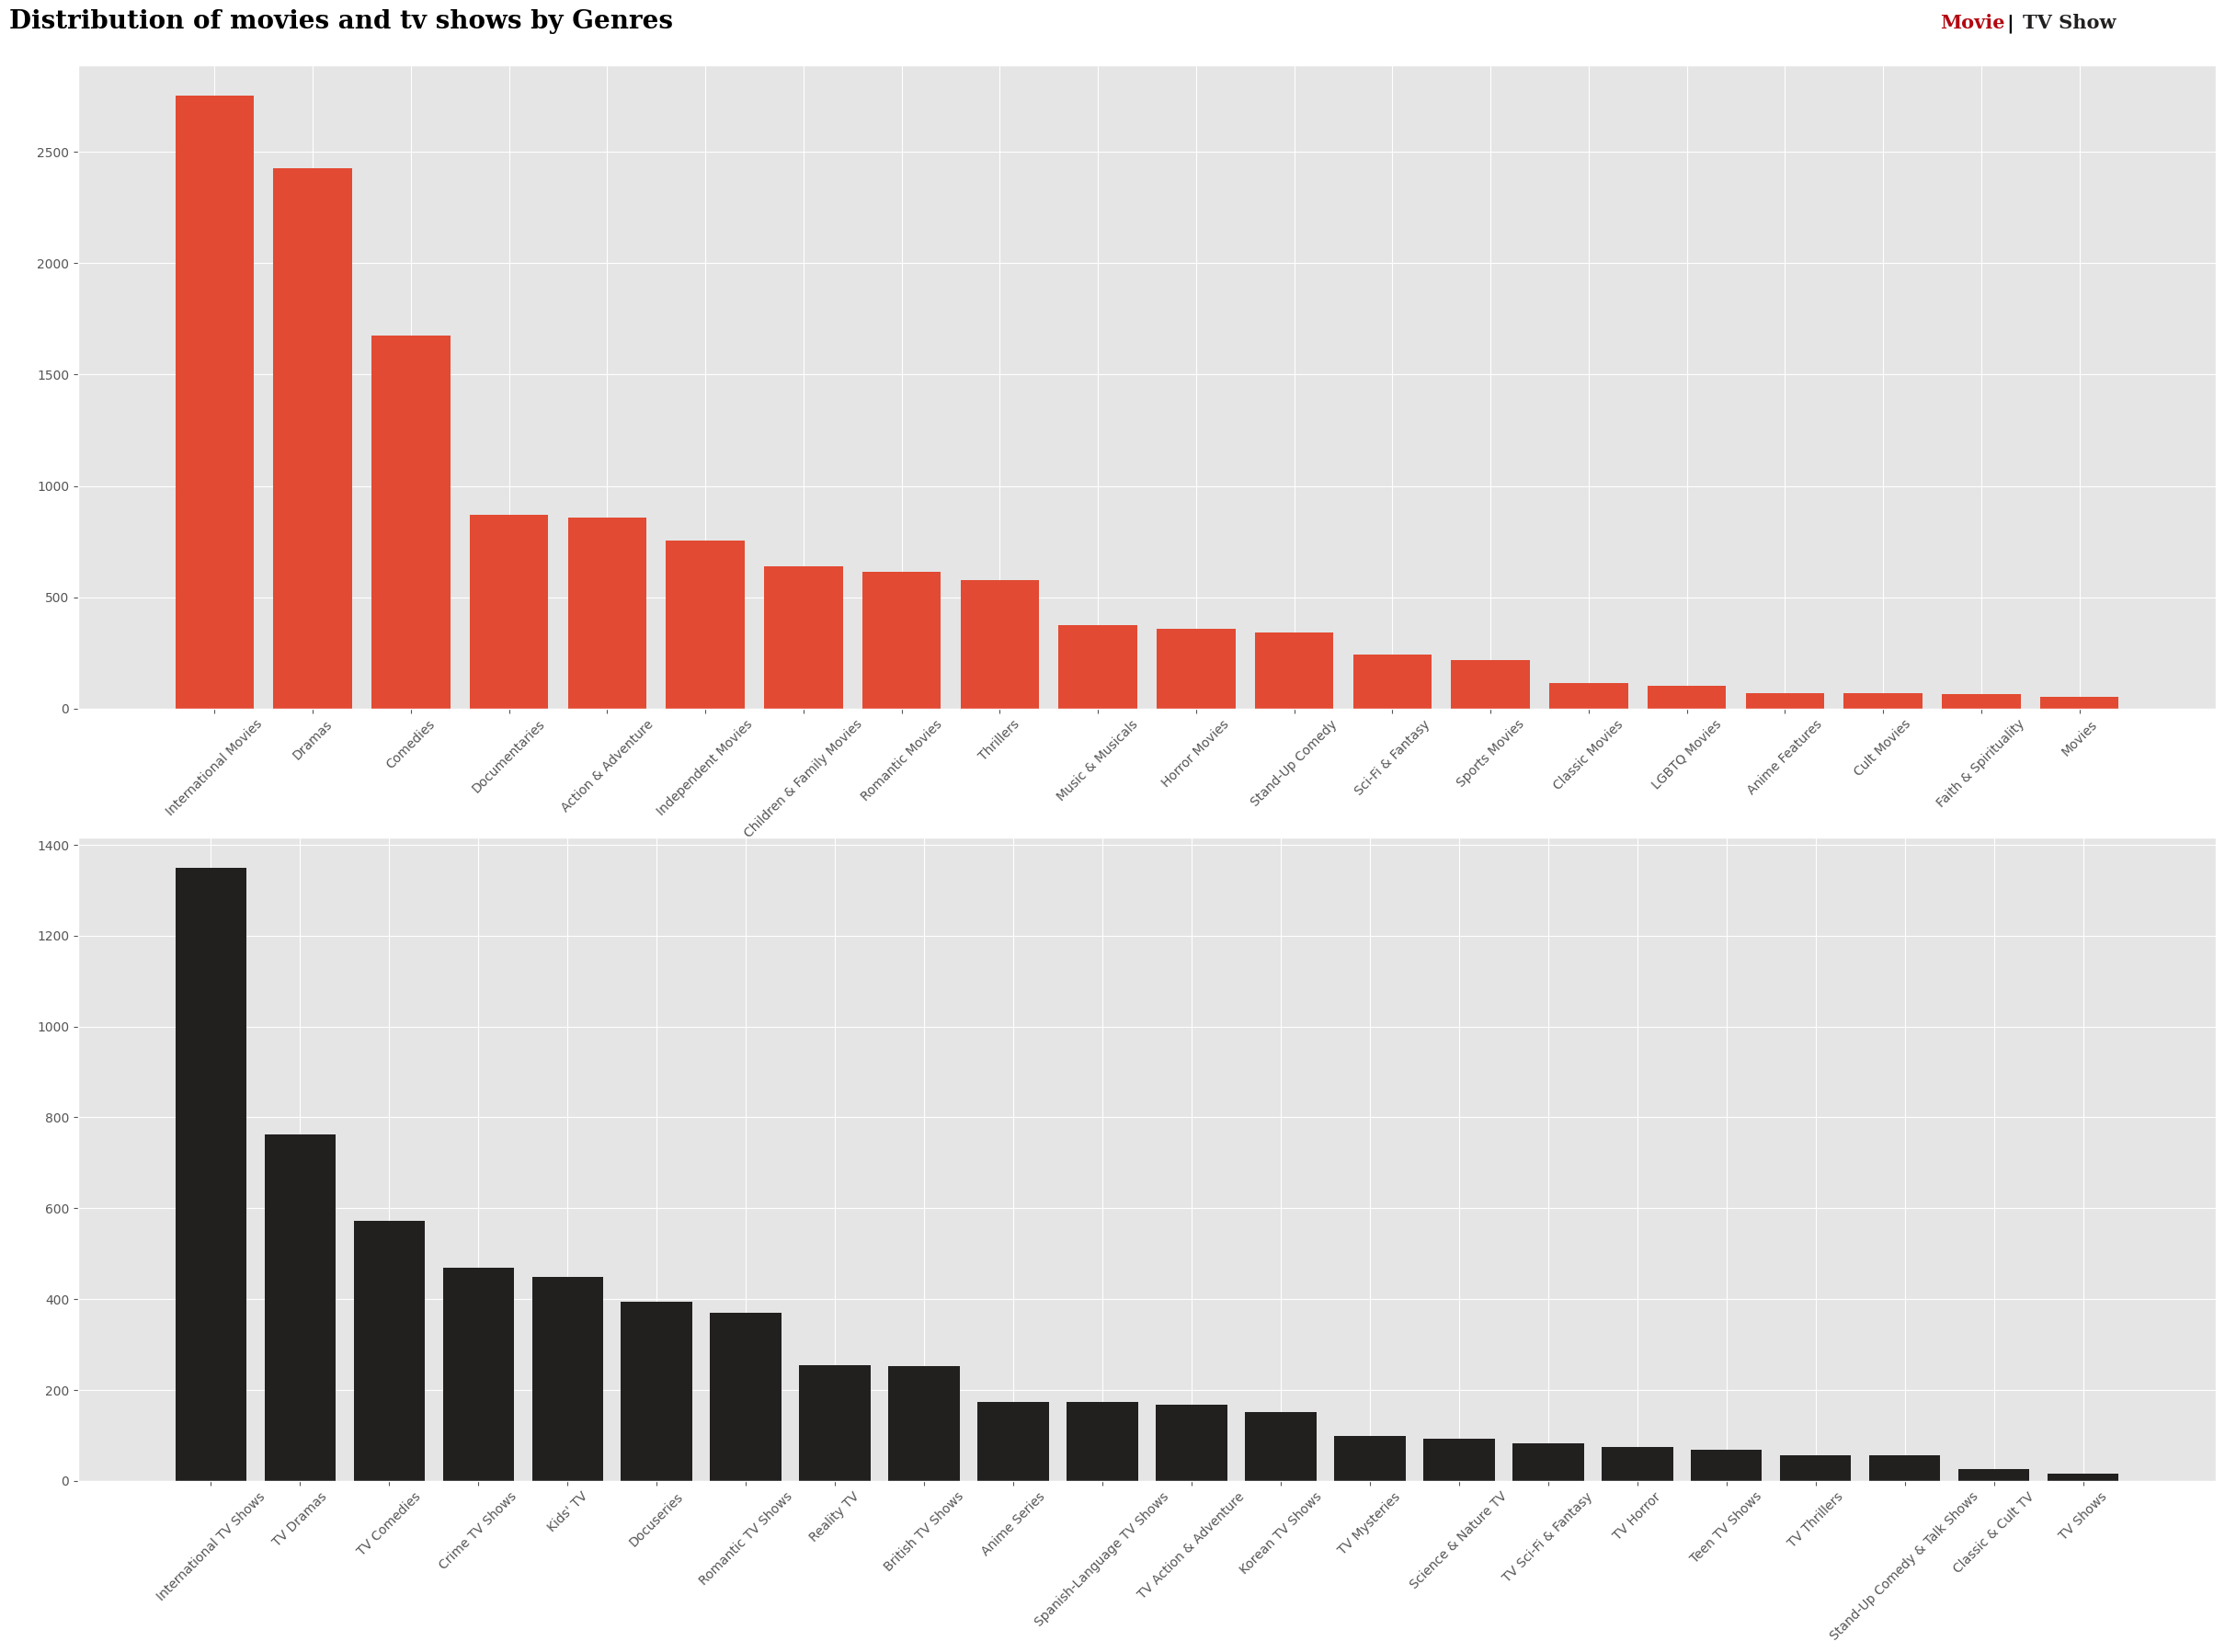

In [17]:
data['genres'] = data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

movie_df = data[data['type']=='Movie']
tv_show_df = data[data['type']=='TV Show']

explode_movie_df = movie_df.explode('genres')
movie_count = explode_movie_df['genres'].value_counts().reset_index()
movie_count.columns = ['genres', 'count']

explode_tv_show_df = tv_show_df.explode('genres')
tv_show_count = explode_tv_show_df['genres'].value_counts().reset_index()
tv_show_count.columns = ['genres', 'count']

fig,ax = plt.subplots(2,1,figsize=(30,20))

ax[0].bar(movie_count['genres'], movie_count['count'])
ax[1].bar(tv_show_count['genres'], tv_show_count['count'], color='#221f1f')

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

fig.text(0.10,0.90,"Distribution of movies and tv shows by Genres", fontsize=20, fontweight='bold', font='serif')
fig.text(0.8,0.90,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.824,0.90,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.83,0.90,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

### 7. Movies added in different genres over time

/tmp/ipykernel_3550/2800117495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['genres'] = movie_df['listed_in'].str.split(',')


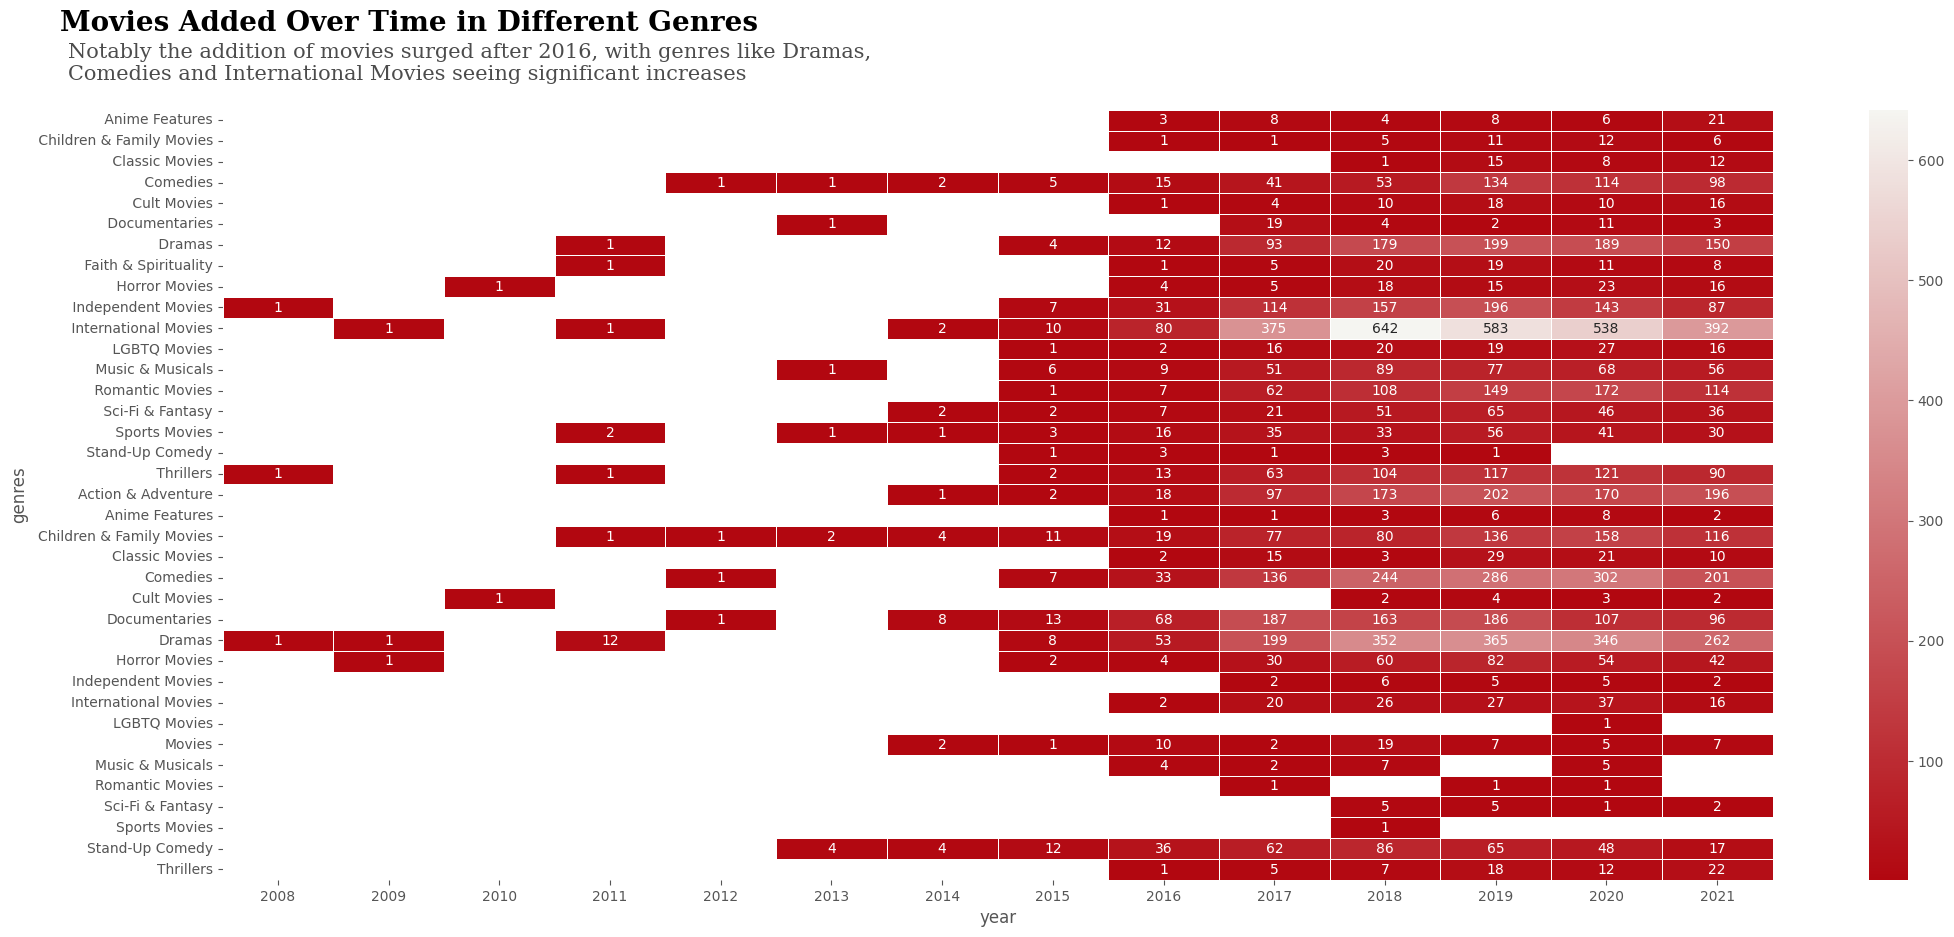

In [18]:
from matplotlib.colors import LinearSegmentedColormap

movie_df['genres'] = movie_df['listed_in'].str.split(',')
movie_df = movie_df.explode('genres')

year_genres = movie_df.groupby(['year', 'genres']).size().reset_index(name='count')
temp_df = year_genres.pivot(index='genres', columns='year', values='count')
# temp_df

cmap = LinearSegmentedColormap.from_list("", ['#b20710','#f5f5f1'])

plt.figure(figsize=(25,10))
ax = sns.heatmap(data=temp_df, annot=True, linewidth=0.5, cmap=cmap, fmt='g', annot_kws={"size": 10})

plt.suptitle('Movies Added Over Time in Different Genres', fontsize=20, fontweight='bold', fontname='serif', x=0.06, ha='left')
plt.title('''
Notably the addition of movies surged after 2016, with genres like Dramas, 
Comedies and International Movies seeing significant increases
''', fontsize=15, fontweight='light', fontname='serif', alpha=0.7, x=-0.1, ha='left')

ax.grid(False)
ax.set_facecolor('none')

plt.show()

In [19]:
data.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,genres
2454,s2455,Movie,The Disaster Artist,James Franco,"James Franco, Dave Franco, Seth Rogen, Josh Hu...",United States,2020-06-01,2017,R,104 min,"Comedies, Dramas",Aspiring actor Greg moves to Los Angeles with ...,2020,6,"[Comedies, Dramas]"
6348,s6349,Movie,Bob's Broken Sleigh,Jay Surridge,"Cole Howard, Bruce Greenwood, Victor Garber, M...",Canada,2015-12-17,2015,TV-G,47 min,Children & Family Movies,"An overly eager elf improves Santa's sleigh, b...",2015,12,[Children & Family Movies]
4249,s4250,Movie,Tom Papa Live in New York City,Rob Zombie,Tom Papa,United States,2018-12-31,2011,TV-14,57 min,Stand-Up Comedy,Comedian Tom Papa riffs on the trials of marri...,2018,12,[Stand-Up Comedy]
1256,s1257,Movie,Tenacious D in The Pick of Destiny,Liam Lynch,"Jack Black, Kyle Gass, JR Reed, Troy Gentile, ...","United States, Germany",2021-03-01,2006,R,94 min,"Comedies, Cult Movies, Music & Musicals","Dreaming of being a rock god, Midwesterner JB ...",2021,3,"[Comedies, Cult Movies, Music & Musicals]"
6015,s6016,Movie,4th Man Out,Andrew Nackman,"Evan Todd, Parker Young, Chord Overstreet, Jon...",United States,2016-05-05,2015,NR,86 min,"Comedies, LGBTQ Movies",A young mechanic comes out to his extremely st...,2016,5,"[Comedies, LGBTQ Movies]"
8002,s8003,TV Show,Sherlock,No Data,"Benedict Cumberbatch, Martin Freeman, Una Stub...","United Kingdom, United States",2017-05-15,2017,TV-14,4 Seasons,"British TV Shows, Crime TV Shows, Internationa...",In this updated take on Sir Arthur Conan Doyle...,2017,5,"[British TV Shows, Crime TV Shows, Internation..."
2207,s2208,Movie,Animal Crackers,"Tony Bancroft, Scott Christian Sava","Emily Blunt, John Krasinski, Ian McKellen, Dan...","China, Spain, South Korea, United States",2020-07-24,2020,TV-Y7,106 min,"Children & Family Movies, Comedies",Enchanted animal crackers turn Owen into whate...,2020,7,"[Children & Family Movies, Comedies]"
1772,s1773,Movie,The 12th Man,Harald Zwart,"Thomas Gullestad, Jonathan Rhys Meyers, Marie ...",Norway,2020-10-31,2018,TV-MA,130 min,"Action & Adventure, Dramas, International Movies","Based on true events, this story follows a Nor...",2020,10,"[Action & Adventure, Dramas, International Mov..."
5145,s5146,TV Show,Padamu Aku Bersujud,No Data,"Syazwan Zulkifli, Sqikin Kamal, Leez Rosli, Bi...",United States,2017-12-01,2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",The son of poor farmers leaves his village to ...,2017,12,"[International TV Shows, Romantic TV Shows, TV..."
8632,s8633,Movie,Trophy,"Shaul Schwarz, Christina Clusiau",No Data,"United Kingdom, Namibia, South Africa, Zimbabw...",2018-02-13,2017,TV-MA,110 min,"Documentaries, International Movies",This documentary explores the tensions between...,2018,2,"[Documentaries, International Movies]"


### 8. Duration Analysis

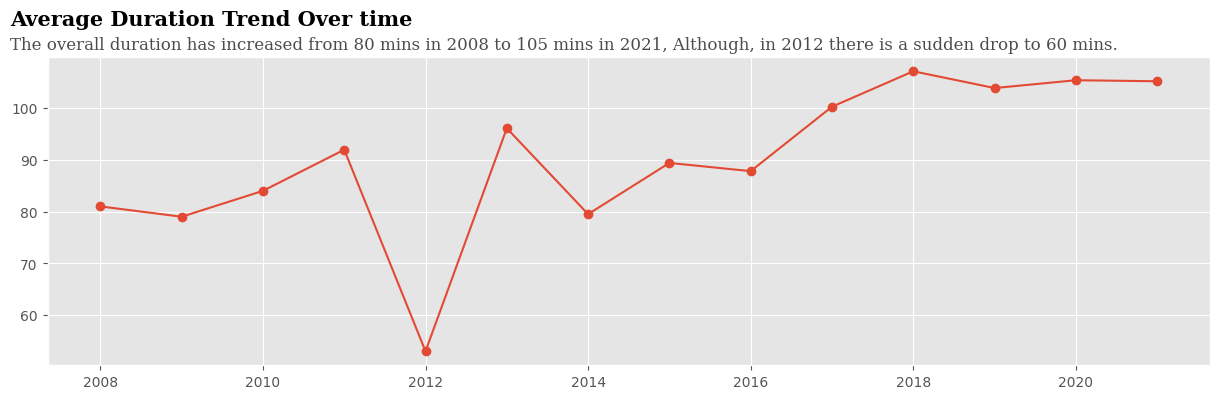

In [20]:
# Duration Trend Over time
movie_df['duration_minutes'] = movie_df['duration'].str.split(" ").str[0].astype(int)
avg_duration = movie_df.groupby('year')['duration_minutes'].mean().round(2)
avg_duration = avg_duration.reset_index()

fig, ax = plt.subplots(1,1,figsize=(15,4))
ax.plot(avg_duration['year'], avg_duration['duration_minutes'], marker='o')

fig.text(0.1, 0.96, "Average Duration Trend Over time", fontsize=15, fontweight='bold', font='serif')
fig.text(0.1, 0.90, "The overall duration has increased from 80 mins in 2008 to 105 mins in 2021, Although, in 2012 there is a sudden drop to 60 mins.", fontsize=12, fontweight='light', font='serif', alpha=0.7)

plt.show()

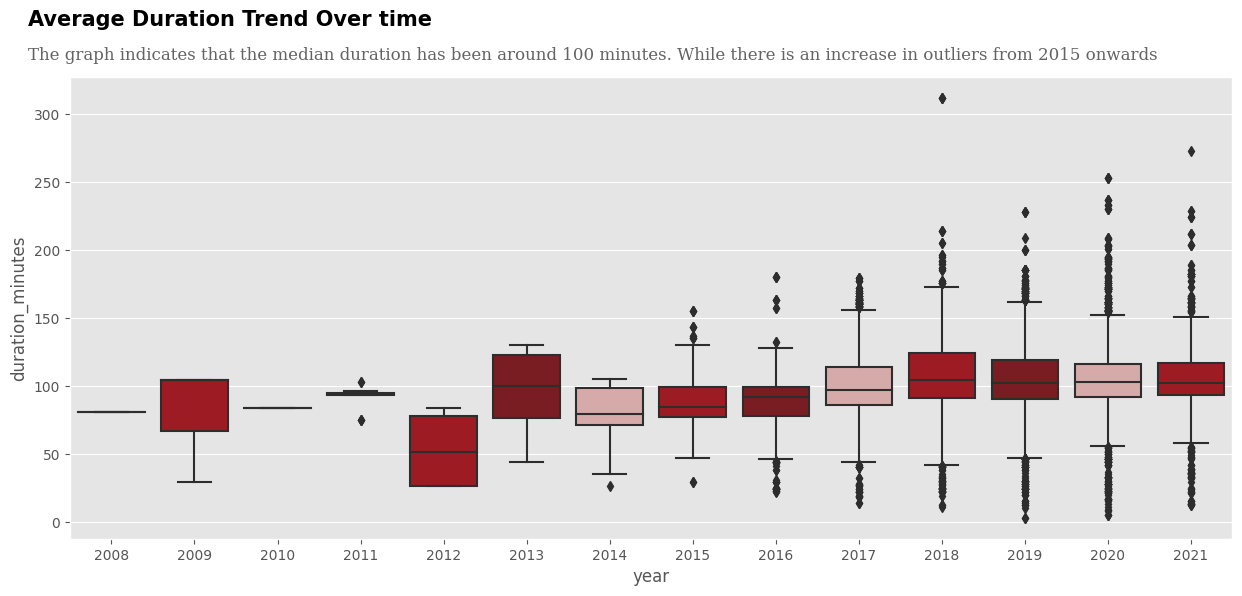

In [21]:
# Duration Distribution of each year
plt.figure(figsize=(15,6))

palette = ['#DEA3A3', '#b20710','#890E14']

ax = sns.boxplot(data=movie_df, x='year', y='duration_minutes', palette=palette)

plt.text(x=-1.0, y=365, s="Average Duration Trend Over time", fontsize=15, fontweight='bold')
plt.text(x = -1.0, y=340, s="The graph indicates that the median duration has been around 100 minutes. While there is an increase in outliers from 2015 onwards", fontweight="light", fontfamily='serif', fontsize=12, color='#221f1f', alpha=0.7)

plt.show()

### 9. Temporal Gap Analysis of Content Over Years

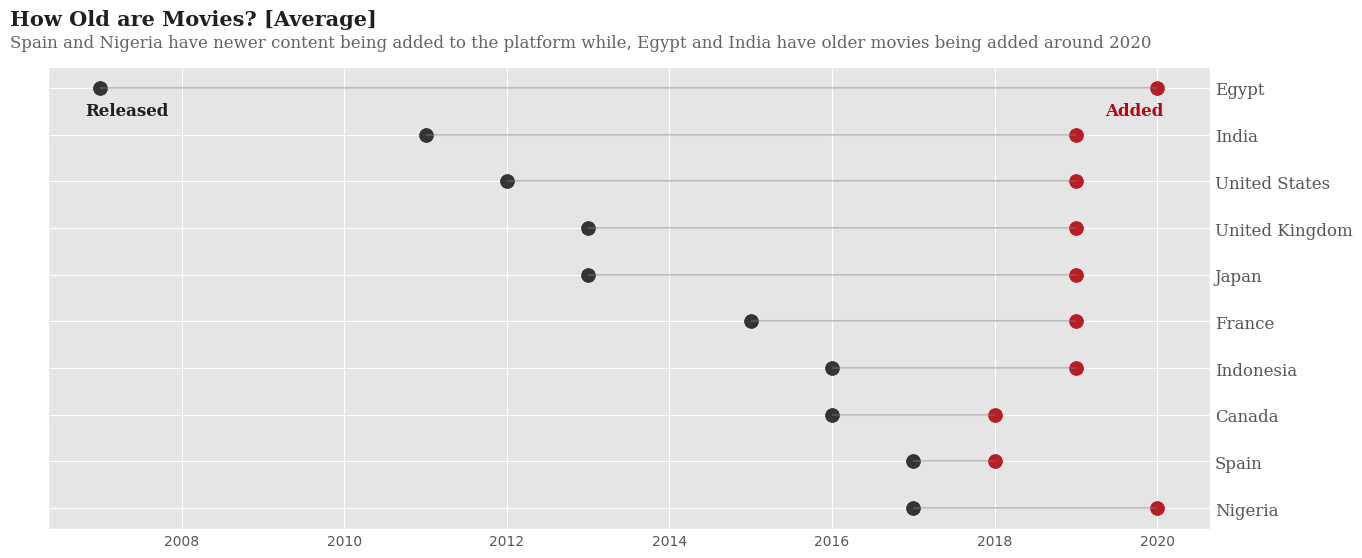

In [23]:
# Analysis for movies
movie_df['first_country'] = movie_df['country'].str.split(',').str[0]

top_10_countries = movie_df['first_country'].value_counts().reset_index()[:10]

# Filter DataFrame for top 10 countries
top_10_df = movie_df[movie_df['first_country'].isin(top_10_countries['first_country'])]


# Group data by country and calculate mean release year and year added
grouped_df = top_10_df.groupby('first_country')[['release_year', 'year']].mean().round().reset_index()
grouped_df = grouped_df.sort_values(by='release_year', ascending=False)

# Range for y-axis
my_range = range(1, len(grouped_df.index) + 1)

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Plot lines connecting release year and year added for each country
plt.hlines(y=my_range, xmin=grouped_df['release_year'], xmax=grouped_df['year'], color='grey', alpha=0.4)

# Plot release year
plt.scatter(grouped_df['release_year'], my_range, color='#221f1f', s=100, alpha=0.9, label='Release Year')

# Plot year added
plt.scatter(grouped_df['year'], my_range, color='#b20710', s=100, alpha=0.9, label='Year Added')

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both', length=0)

# Move Y axis to the right side
ax.yaxis.tick_right()

# Customizing the y-axis labels
plt.yticks(my_range, grouped_df['first_country'], fontname='serif', fontsize=12)

# Custom legend
fig.text(0.10, 0.95, "How Old are Movies? [Average]", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
fig.text(0.10, 0.88, 
'''
Spain and Nigeria have newer content being added to the platform while, Egypt and India have older movies being added around 2020
''', fontweight="light", fontfamily='serif', fontsize=12, color='#221f1f', alpha=0.7)
fig.text(0.15, 0.8, "Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.83, 0.8, "Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')

plt.show()

/tmp/ipykernel_3550/3460495843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_df['first_country'] = tv_show_df['country'].str.split(',').str[0]


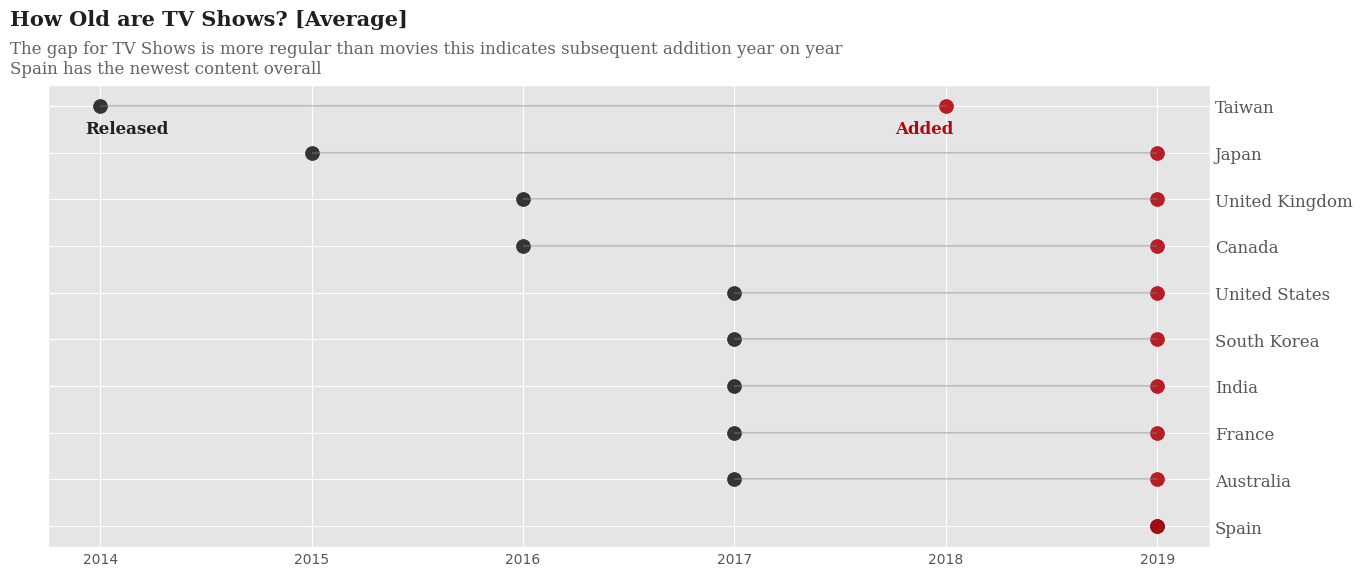

In [25]:
# Analysis for TV Shows
tv_show_df['first_country'] = tv_show_df['country'].str.split(',').str[0]

top_10_countries = tv_show_df['first_country'].value_counts().reset_index()[:10]

# Filter DataFrame for top 10 countries
top_10_df = tv_show_df[tv_show_df['first_country'].isin(top_10_countries['first_country'])]


# Group data by country and calculate mean release year and year added
grouped_df = top_10_df.groupby('first_country')[['release_year', 'year']].mean().round().reset_index()
grouped_df = grouped_df.sort_values(by='release_year', ascending=False)

# Range for y-axis
my_range = range(1, len(grouped_df.index) + 1)

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Plot lines connecting release year and year added for each country
plt.hlines(y=my_range, xmin=grouped_df['release_year'], xmax=grouped_df['year'], color='grey', alpha=0.4)

# Plot release year
plt.scatter(grouped_df['release_year'], my_range, color='#221f1f', s=100, alpha=0.9, label='Release Year')

# Plot year added
plt.scatter(grouped_df['year'], my_range, color='#b20710', s=100, alpha=0.9, label='Year Added')

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both', length=0)

# Move Y axis to the right side
ax.yaxis.tick_right()

# Customizing the y-axis labels
plt.yticks(my_range, grouped_df['first_country'], fontname='serif', fontsize=12)

# Custom legend
fig.text(0.10, 0.98, "How Old are TV Shows? [Average]", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
fig.text(0.10, 0.9, 
'''
The gap for TV Shows is more regular than movies this indicates subsequent addition year on year
Spain has the newest content overall''', fontweight="light", fontfamily='serif', fontsize=12, color='#221f1f', alpha=0.7)
fig.text(0.15, 0.8, "Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.69, 0.8, "Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')

plt.show()

### 10. Word Count

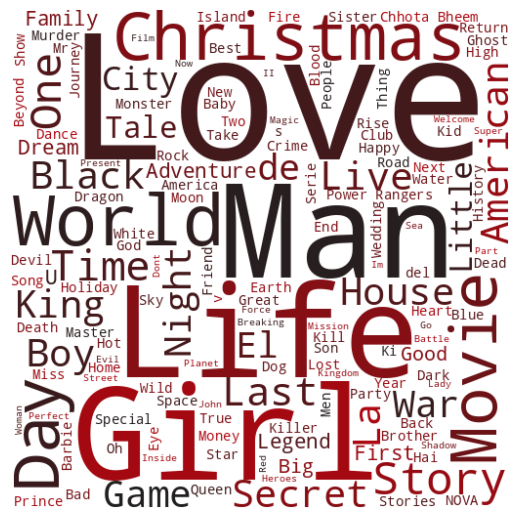

In [26]:
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import random

cmap = LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(data['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('/kaggle/input/images/netflix_logo_icon_170919.png'))

wordcloud = WordCloud(background_color='white', width=500, height=200, colormap=cmap, max_words=150, mask=mask).generate(text)
                                         
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()